In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
file1 = pd.read_csv('aug18.csv')
file2 = pd.read_csv('FirstConcat.csv')
file3 = pd.read_csv('aug20.csv')

copy1 = pd.DataFrame(file1)
#I want to be able to access day for grouping. also hour...
day1 = []
hour1 = []
ampm1 = []

for i in range(len(copy1['Time Stamp'])):
    day1.append(int(copy1['Time Stamp'][i].split(' ')[0].split('/')[1]))
    time = copy1['Time Stamp'][i].split(' ')[1].split(':')
    hours = int(time[0])
    mins = int(time[1])
    secs = int(time[2])
    num = hours + mins/60 + secs/3600
    hour1.append(num)
    if int(hours) < 12:
        ampm1.append('AM')
    else:
        ampm1.append('PM')
        
copy1['day'] = day1
copy1['hour'] = hour1
copy1['ampm'] = ampm1

copy2 = pd.DataFrame(file2)
#I want to be able to access day for grouping. also hour...
day2 = []
hour2 = []
ampm2 = []

for i in range(len(copy2['Time Stamp'])):
    day2.append(int(copy2['Time Stamp'][i].split(' ')[0].split('/')[1]))
    time = copy2['Time Stamp'][i].split(' ')[1].split(':')
    hours = int(time[0])
    mins = int(time[1])
    secs = int(time[2])
    num = hours + mins/60 + secs/3600
    hour2.append(num)
    if int(hours) < 12:
        ampm2.append('AM')
    else:
        ampm2.append('PM')
        
copy2['day'] = day2
copy2['hour'] = hour2
copy2['ampm'] = ampm2

copy3 = pd.DataFrame(file3)
#I want to be able to access day for grouping. also hour...
day3 = []
hour3 = []
ampm3 = []

for i in range(len(copy3['Time Stamp'])):
    day3.append(int(copy3['Time Stamp'][i].split(' ')[0].split('/')[1]))
    time = copy3['Time Stamp'][i].split(' ')[1].split(':')
    hours = int(time[0])
    mins = int(time[1])
    secs = int(time[2])
    num = hours + mins/60 + secs/3600
    hour3.append(num)
    if int(hours) < 12:
        ampm3.append('AM')
    else:
        ampm3.append('PM')
        
copy3['day'] = day3
copy3['hour'] = hour3
copy3['ampm'] = ampm3

In [55]:
emfactor = dict({'Dual Fuel': 0.444, 'Natural Gas': 0.426, 'Other Fossil Fuels': 0.935, 'Other Renewables': 0.256})

em_df1 = pd.DataFrame(index = np.arange(1,32), columns = ['Dual Fuel kWh', 'Dual Fuel Emissions','Natural Gas kWh','Natural Gas Emissions',
                                      'Other Fossil Fuels kWh','Other Fossil Fuels Emissions',
                                       'Other Renewables kWh','Other Renewables Emissions','Total kWh', 'Total Emissions'])

em_df2 = pd.DataFrame(index = np.arange(1,32), columns = ['Dual Fuel kWh', 'Dual Fuel Emissions','Natural Gas kWh','Natural Gas Emissions',
                                      'Other Fossil Fuels kWh','Other Fossil Fuels Emissions',
                                       'Other Renewables kWh','Other Renewables Emissions','Total kWh','Total Emissions'])

em_df3 = pd.DataFrame(index = np.arange(1,32), columns = ['Dual Fuel kWh', 'Dual Fuel Emissions','Natural Gas kWh','Natural Gas Emissions',
                                      'Other Fossil Fuels kWh','Other Fossil Fuels Emissions',
                                       'Other Renewables kWh','Other Renewables Emissions','Total kWh','Total Emissions'])

for i in range(1,32):
    today = copy1[copy1['day'] == i]
    times = today['hour']
    fuel = today['Dual Fuel']
    gas = today['Natural Gas']
    fossil = today['Other Fossil Fuels']
    rens = today['Other Renewables']
    
    #mWh to kWh is *1000
    totalFuel = np.trapz(fuel, x = times) * 1000
    totalGas = np.trapz(gas, x = times) * 1000
    totalFossil = np.trapz(fossil, x = times) * 1000
    totalRens = np.trapz(rens, x = times) * 1000
    
    #Multiply by their emission factor
    fuel_em = totalFuel * emfactor['Dual Fuel']
    gas_em = totalGas * emfactor['Natural Gas']
    fos_em = totalFossil * emfactor['Other Fossil Fuels']
    rens_em = totalRens * emfactor['Other Renewables']
    
    total_kw = totalFuel + totalGas + totalFossil + totalRens
    total_em = fuel_em + gas_em + fos_em + rens_em
    
    em_df1.loc[i] = [totalFuel, fuel_em, totalGas, gas_em, totalFossil, fos_em, totalRens, rens_em, total_kw, total_em]
    
for i in range(1,32):
    today = copy2[copy2['day'] == i]
    times = today['hour']
    fuel = today['Dual Fuel']
    gas = today['Natural Gas']
    fossil = today['Other Fossil Fuels']
    rens = today['Other Renewables']
    
    #mWh to kWh is *1000
    totalFuel = np.trapz(fuel, x = times) * 1000
    totalGas = np.trapz(gas, x = times) * 1000
    totalFossil = np.trapz(fossil, x = times) * 1000
    totalRens = np.trapz(rens, x = times) * 1000
    
    #Multiply by their emission factor
    fuel_em = totalFuel * emfactor['Dual Fuel']
    gas_em = totalGas * emfactor['Natural Gas']
    fos_em = totalFossil * emfactor['Other Fossil Fuels']
    rens_em = totalRens * emfactor['Other Renewables']
    
    total_kw = totalFuel + totalGas + totalFossil + totalRens
    total_em = fuel_em + gas_em + fos_em + rens_em
    
    em_df2.loc[i] = [totalFuel, fuel_em, totalGas, gas_em, totalFossil, fos_em, totalRens, rens_em, total_kw, total_em]
    
for i in range(1,32):
    today = copy3[copy3['day'] == i]
    times = today['hour']
    fuel = today['Dual Fuel']
    gas = today['Natural Gas']
    fossil = today['Other Fossil Fuels']
    rens = today['Other Renewables']
    
    #mWh to kWh is *1000
    totalFuel = np.trapz(fuel, x = times) * 1000
    totalGas = np.trapz(gas, x = times) * 1000
    totalFossil = np.trapz(fossil, x = times) * 1000
    totalRens = np.trapz(rens, x = times) * 1000
    
    #Multiply by their emission factor
    fuel_em = totalFuel * emfactor['Dual Fuel']
    gas_em = totalGas * emfactor['Natural Gas']
    fos_em = totalFossil * emfactor['Other Fossil Fuels']
    rens_em = totalRens * emfactor['Other Renewables']
    
    total_kw = totalFuel + totalGas + totalFossil + totalRens
    total_em = fuel_em + gas_em + fos_em + rens_em
    
    em_df3.loc[i] = [totalFuel, fuel_em, totalGas, gas_em, totalFossil, fos_em, totalRens, rens_em, total_kw, total_em]

In [35]:
em_df1['Total Emissions'].sum()

3182018515.8586116

In [36]:
em_df2['Total Emissions'].sum()/em_df1['Total Emissions'].sum()

0.8696722686088372

In [37]:
em_df3['Total Emissions'].sum()/em_df1['Total Emissions'].sum()

0.9706789708576898

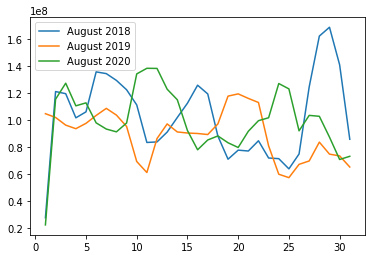

In [34]:
plt.plot(em_df1['Total Emissions'], label = 'August 2018')
plt.plot(em_df2['Total Emissions'], label = 'August 2019')
plt.plot(em_df3['Total Emissions'], label = 'August 2020')
plt.legend()
plt.show()

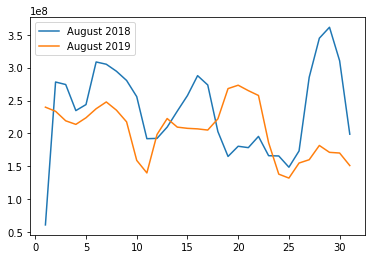

In [57]:
plt.plot(em_df1['Total kWh'], label = 'August 2018')
plt.plot(em_df2['Total kWh'], label = 'August 2019')
plt.legend()
plt.show()

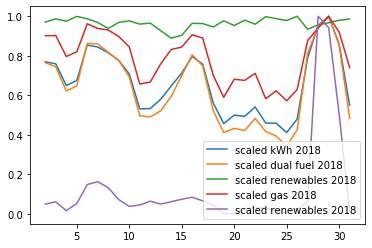

In [64]:
plt.plot(em_df1['Total kWh'][1:]/em_df1['Total kWh'].max(), label = 'scaled kWh 2018')
plt.plot(em_df1['Dual Fuel kWh'][1:]/em_df1['Dual Fuel kWh'].max(), label = 'scaled dual fuel 2018')
plt.plot(em_df1['Other Renewables kWh'][1:]/em_df1['Other Renewables kWh'].max(), label = 'scaled renewables 2018')
plt.plot(em_df1['Natural Gas kWh'][1:]/em_df1['Natural Gas kWh'].max(), label = 'scaled gas 2018')
plt.plot(em_df1['Other Fossil Fuels kWh'][1:]/em_df1['Other Fossil Fuels kWh'].max(), label = 'scaled other fossil fuels 2018')
plt.legend()

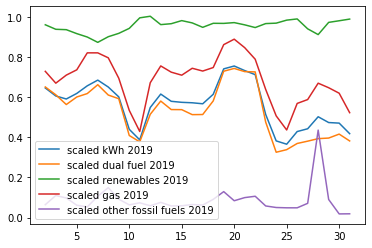

In [65]:
plt.plot(em_df2['Total kWh'][1:]/em_df1['Total kWh'].max(), label = 'scaled kWh 2019')
plt.plot(em_df2['Dual Fuel kWh'][1:]/em_df1['Dual Fuel kWh'].max(), label = 'scaled dual fuel 2019')
plt.plot(em_df2['Other Renewables kWh'][1:]/em_df1['Other Renewables kWh'].max(), label = 'scaled renewables 2019')
plt.plot(em_df2['Natural Gas kWh'][1:]/em_df1['Natural Gas kWh'].max(), label = 'scaled gas 2019')
plt.plot(em_df2['Other Fossil Fuels kWh'][1:]/em_df1['Other Fossil Fuels kWh'].max(), label = 'scaled other fossil fuels 2019')
plt.legend()

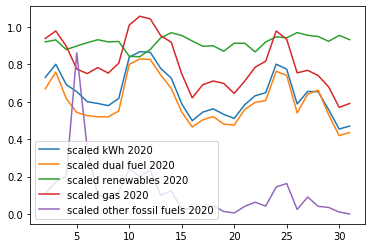

In [66]:
plt.plot(em_df3['Total kWh'][1:]/em_df1['Total kWh'].max(), label = 'scaled kWh 2020')
plt.plot(em_df3['Dual Fuel kWh'][1:]/em_df1['Dual Fuel kWh'].max(), label = 'scaled dual fuel 2020')
plt.plot(em_df3['Other Renewables kWh'][1:]/em_df1['Other Renewables kWh'].max(), label = 'scaled renewables 2020')
plt.plot(em_df3['Natural Gas kWh'][1:]/em_df1['Natural Gas kWh'].max(), label = 'scaled gas 2020')
plt.plot(em_df3['Other Fossil Fuels kWh'][1:]/em_df1['Other Fossil Fuels kWh'].max(), label = 'scaled other fossil fuels 2020')
plt.legend()

explore proportion of total energy that is renewable?